In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


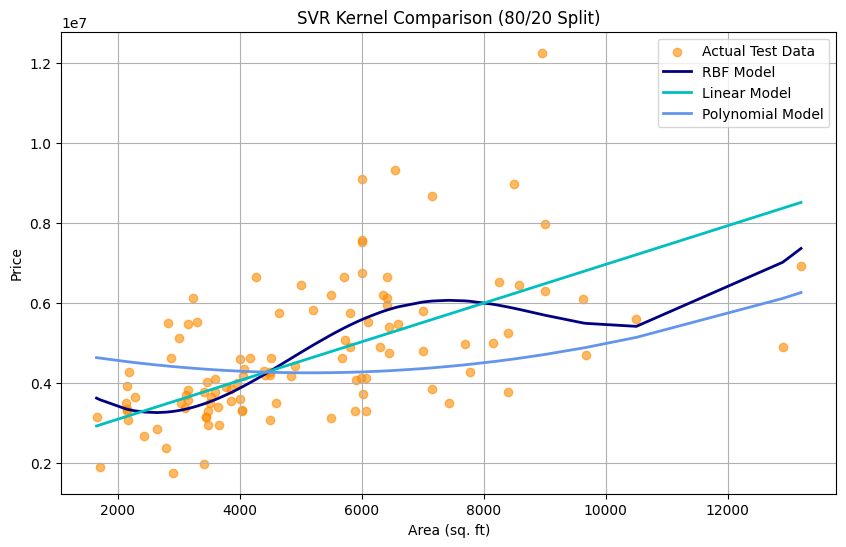

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

file_path = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_path)

# Feature selection
features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]

X = data[features].copy()
y = data['price']

# Encode categorical yes/no columns
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea']:
    X.loc[:, col] = X[col].map({'yes': 1, 'no': 0})

# Focus on single feature 'area' for visualization
X_area = X[['area']].values
y_price = y.values

# Split data into 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_area, y_price, test_size=0.2, random_state=0
)

# Standardize feature and target
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train SVR models
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100)
svr_poly = SVR(kernel='poly', C=100, degree=2)

# Fit on training data
svr_rbf.fit(X_train_scaled, y_train_scaled)
svr_lin.fit(X_train_scaled, y_train_scaled)
svr_poly.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_rbf_pred_scaled = svr_rbf.predict(X_test_scaled)
y_lin_pred_scaled = svr_lin.predict(X_test_scaled)
y_poly_pred_scaled = svr_poly.predict(X_test_scaled)

# Inverse-transform predictions to original scale
y_rbf_pred = sc_y.inverse_transform(y_rbf_pred_scaled.reshape(-1, 1)).ravel()
y_lin_pred = sc_y.inverse_transform(y_lin_pred_scaled.reshape(-1, 1)).ravel()
y_poly_pred = sc_y.inverse_transform(y_poly_pred_scaled.reshape(-1, 1)).ravel()

sorted_idx = np.argsort(X_test.ravel())
X_sorted = X_test.ravel()[sorted_idx]

plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='darkorange', label='Actual Test Data', alpha=0.6)
plt.plot(X_sorted, y_rbf_pred[sorted_idx], color='navy', lw=2, label='RBF Model')
plt.plot(X_sorted, y_lin_pred[sorted_idx], color='c', lw=2, label='Linear Model')
plt.plot(X_sorted, y_poly_pred[sorted_idx], color='cornflowerblue', lw=2, label='Polynomial Model')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price')
plt.title('SVR Kernel Comparison (80/20 Split)')
plt.legend()
plt.grid(True)
plt.show()




In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from google.colab import drive

file_path = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_path)

# Select relevant features
features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]

X = data[features].copy()
y = data['price']

# Encode yes/no columns safely
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea']:
    X.loc[:, col] = X[col].map({'yes': 1, 'no': 0})

# Split data into 80% training / 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features and target
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Kernels to compare
kernels = ['linear', 'poly', 'rbf']
accuracies = []

# Train and evaluate models
for kernel in kernels:
    model = SVR(kernel=kernel, C=100, gamma='scale', epsilon=0.1)
    model.fit(X_train_scaled, y_train_scaled)
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    r2 = r2_score(y_test, y_pred)
    accuracies.append(r2)

# Display accuracy comparison
print("=== SVR Kernel Accuracy (R² Score) ===")
for i, k in enumerate(kernels):
    print(f"{k.upper()} Kernel: Accuracy (R²) = {accuracies[i]:.4f}")



=== SVR Kernel Accuracy (R² Score) ===
LINEAR Kernel: Accuracy (R²) = 0.6180
POLY Kernel: Accuracy (R²) = -0.1425
RBF Kernel: Accuracy (R²) = 0.5715
